In [1]:
from transformers import GPT2Tokenizer
import pandas as pd

df = pd.read_csv('UVQuAD.csv')
df.head()

,title,context,question,answer
0,titulo,Vestibular Unicamp 2024\nResolução GR-031/2023...,Quando foi publicada a Resolução Vestibular Un...,"{'text': ['13/07/2023'], 'answer_start': []}"
1,titulo,Vestibular Unicamp 2024\nResolução GR-031/2023...,Quem é o Reitor da Universidade Estadual de Ca...,"{'text': ['Maria Luiza Moretti'], 'answer_star..."
2,titulo,Vestibular Unicamp 2024\nResolução GR-031/2023...,Qual é a finalidade da Resolução Vestibular Un...,{'text': ['Especificar os sistemas de ingresso...
3,Vagas e sistemas de ingresso à Graduação,Art. 1º Para o ano de 2024 são oferecidas 3340...,Quantas vagas regulares são oferecidas para in...,"{'text': ['3340'], 'answer_start': []}"
4,Vagas e sistemas de ingresso à Graduação,Art. 1º Para o ano de 2024 são oferecidas 3340...,Quais são os sistemas de ingresso para os curs...,"{'text': ['Vestibular Unicamp (VU) 2024', 'Edi..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     1270 non-null   object
 1   context   1270 non-null   object
 2   question  1270 non-null   object
 3   answer    1270 non-null   object
dtypes: object(4)
memory usage: 39.8+ KB


In [39]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.6/153.6 kB 3.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 28.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.9/303.9 kB 6.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 17.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 2.1 MB/s eta 0:00:00:00:01


183


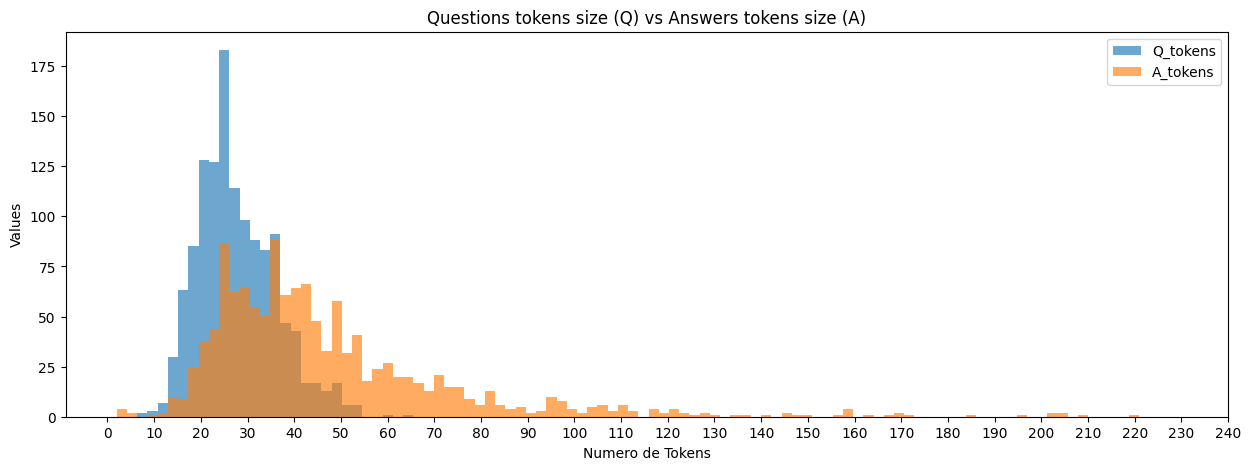

In [97]:
import matplotlib.pyplot as plt
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
data = []
for i in range(len(df)):
    data.append(
        {
            "Q_tokens" : len(tokenizer(df['question'][i])['input_ids']),
            "A_tokens" : len(tokenizer(eval(df['answer'][i])['text'][0])['input_ids'])
        }
    )
df_tokens = pd.DataFrame(data)
print(len(df_tokens.query("Q_tokens >= 24 and Q_tokens <= 26")))
df_tokens.plot(kind="hist",
               bins=100,
            #    edgecolor="white",
               alpha=0.65,
               figsize=(15, 5))
plt.xlabel('Numero de Tokens')
plt.ylabel('Values')
plt.xticks(range(0, 250, 10))
plt.title("Questions tokens size (Q) vs Answers tokens size (A)")
plt.legend()
# print()


In [19]:
tokenizer("""
  ""perguntas"": {
    ""p0"": ""Qual a diferença entre fórmulas moleculares, estruturais e de Lewis?"",
    ""p1"": ""O que é isomeria e quais são seus tipos?"",
    ""p2"": ""Quais são as funções orgânicas mais comuns e como reconhecê-las?"",
    ""p3"": ""Quais são os compostos mais simples e representativos e suas propriedades?""
  },
  ""respostas"": {
    ""p0"": {
      ""r0"": ""A fórmula molecular mostra a quantidade real de átomos em uma molécula. A fórmula estrutural mostra como os átomos estão ligados uns aos outros. A fórmula de Lewis mostra os elétrons de valência e as ligações entre os átomos."",
      ""r1"": ""A fórmula molecular mostra a quantidade real de átomos em uma molécula. A fórmula estrutural mostra como os átomos estão ligados uns aos outros. A fórmula de Lewis mostra os elétrons de valência e as ligações entre os átomos."",
      ""r2"": ""A fórmula molecular mostra a quantidade real de átomos em uma molécula. A fórmula estrutural mostra como os átomos estão ligados uns aos outros. A fórmula de Lewis mostra os elétrons de valência e as ligações entre os átomos.""
    },
    ""p1"": {
      ""r0"": ""Isomeria é a existência de compostos que possuem a mesma fórmula molecular, mas estruturas diferentes. Os principais tipos de isomeria são isomeria plana (cadeia, posição, função e tautomérica) e isomeria espacial (geométrica e óptica)."",
      ""r1"": ""Isomeria é a existência de compostos que possuem a mesma fórmula molecular, mas estruturas diferentes. Os principais tipos de isomeria são isomeria plana (cadeia, posição, função e tautomérica) e isomeria espacial (geométrica e óptica)."",
      ""r2"": ""Isomeria é a existência de compostos que possuem a mesma fórmula molecular, mas estruturas diferentes. Os principais tipos de isomeria são isomeria plana (cadeia, posição, função e tautomérica) e isomeria espacial (geométrica e óptica).""
    },
    ""p2"": {
      ""r0"": ""As funções orgânicas mais comuns são hidrocarbonetos, compostos halogenados, alcoóis, fenóis, éteres, aldeídos, cetonas, ácidos carboxílicos, aminas e amidas. Para reconhecê-las é preciso observar os grupos funcionais presentes nas moléculas."",
      ""r1"": ""As funções orgânicas mais comuns são hidrocarbonetos, compostos halogenados, alcoóis, fenóis, éteres, aldeídos, cetonas, ácidos carboxílicos, aminas e amidas. Para reconhecê-las é preciso observar os grupos funcionais presentes nas moléculas."",
      ""r2"": ""As funções orgânicas mais comuns são hidrocarbonetos, compostos halogenados, alcoóis, fenóis, éteres, aldeídos, cetonas, ácidos carboxílicos, aminas e amidas. Para reconhecê-las é preciso observar os grupos funcionais presentes nas moléculas.""
    },
    ""p3"": {
      ""r0"": ""Alguns exemplos de compostos simples e representativos são o metano, o etanol, o ácido acético e o acetona. Suas propriedades variam de acordo com seus grupos funcionais, como solubilidade em água, ponto de ebulição e acidez ou basicidade."",
      ""r1"": ""Alguns exemplos de compostos simples e representativos são o metano, o etanol, o ácido acético e o acetona. Suas propriedades variam de acordo com seus grupos funcionais, como solubilidade em água, ponto de ebulição e acidez ou basicidade."",
      ""r2"": ""Alguns exemplos de compostos simples e representativos são o metano, o etanol, o ácido acético e o acet""")["input_ids"].__len__()

1390